# Feature importance

In [10]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv(r'../data/dataset_merged_with_price.csv', index_col=0)
data.head()

,active_addresses,tweets,top_100_percent,difficulty,transactions,av_transaction_size,market_cap,confirmation_time,median_transaction_value,send_usd,...,av_transaction_value,full_name,coin,FEDFUNDS,gold_open,gold_high,gold_low,gold_close,gold_volume,btc_price
date,,,,,,,,,,,,,,,,,,,,,
2015-08-01,267062.0,26960.0,20.93,5.227830e+10,147326.0,NaN,4.006359e+09,9.29,53.55,219635191.0,...,1502.0,bitcoin,btc,0.14,NaN,NaN,NaN,NaN,0,280.98
2015-08-02,260292.0,24294.0,20.93,5.227830e+10,103449.0,NaN,4.009289e+09,9.54,48.11,180286651.0,...,1827.0,bitcoin,btc,0.14,NaN,NaN,NaN,NaN,0,280.32
2015-08-03,247772.0,35036.0,20.95,5.227830e+10,119687.0,NaN,4.040683e+09,9.17,72.78,289689678.0,...,2436.0,bitcoin,btc,0.14,1095.72,1097.68,1085.79,1086.66,78495,282.59
2015-08-04,260149.0,34486.0,20.83,5.227830e+10,132411.0,NaN,4.044523e+09,10.59,129.19,332340266.0,...,2510.0,bitcoin,btc,0.14,1085.32,1094.78,1080.94,1087.61,85634,283.59
2015-08-05,280613.0,31470.0,20.77,5.227830e+10,133625.0,NaN,4.022246e+09,10.83,123.22,347586782.0,...,2627.0,bitcoin,btc,0.14,1087.31,1092.48,1082.92,1084.77,85788,282.59


Analyse the feature importance: 

In [ ]:
X = data[["tweets", "top_100_percent", "difficulty", "transactions", "google_trends",
          "mining_profitability","hashrate","sent_addresses","median_transaction_size","fee_reward","av_transaction_value",
          "FEDFUNDS", "gold_open","gold_high","gold_low","gold_close"]].dropna()
print(X)

             tweets  top_100_percent    difficulty  transactions  \
date                                                               
2015-08-03  35036.0            20.95  5.227830e+10      119687.0   
2015-08-04  34486.0            20.83  5.227830e+10      132411.0   
2015-08-05  31470.0            20.77  5.227830e+10      133625.0   
2015-08-06  35658.0            20.67  5.227830e+10      134695.0   
2015-08-07  47467.0            20.69  5.227830e+10      111208.0   
...             ...              ...           ...           ...   
2020-12-23  43942.0            13.31  1.867017e+13      338309.0   
2020-12-24  42618.0            13.31  1.867017e+13      269433.0   
2020-12-25  49739.0            13.32  1.867017e+13      303757.0   
2020-12-26  72172.0            13.32  1.867017e+13      273817.0   
2020-12-27  88788.0            13.38  1.867017e+13      308857.0   

            google_trends  mining_profitability      hashrate  sent_addresses  \
date                              

In [6]:
Y = data["btc_price"].iloc[2:].to_frame()
print(Y)

            btc_price
date                 
2015-08-03     282.59
2015-08-04     283.59
2015-08-05     282.59
2015-08-06     279.11
2015-08-07     278.09
...               ...
2020-12-23   23562.00
2020-12-24   23307.00
2020-12-25   24013.00
2020-12-26   25252.00
2020-12-27   27061.00

[1974 rows x 1 columns]


[0.00821971 0.08917961 0.22876417 0.00148239 0.03638284 0.04558491
 0.20505962 0.00096544 0.02831844 0.00660404 0.06265444 0.11125509
 0.03673213 0.04286298 0.05460462 0.04132956]


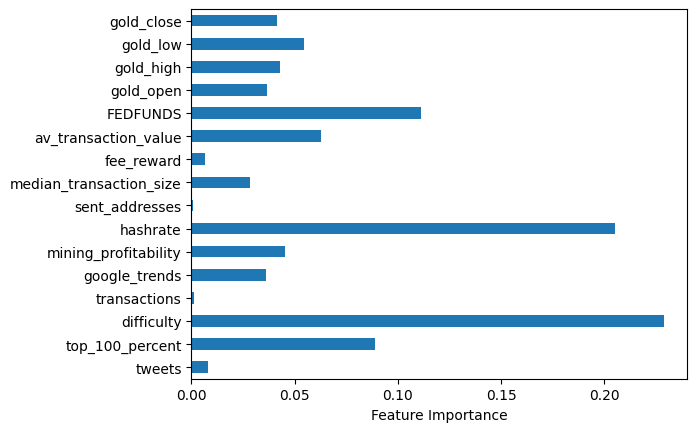

In [28]:
Y = data["btc_price"].iloc[2:]
Y = Y.fillna(Y.median())

model = ExtraTreesRegressor()
model.fit(X,Y)
print (model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind="barh")
plt.xlabel("Feature Importance")
plt.show()

Count the correlations:

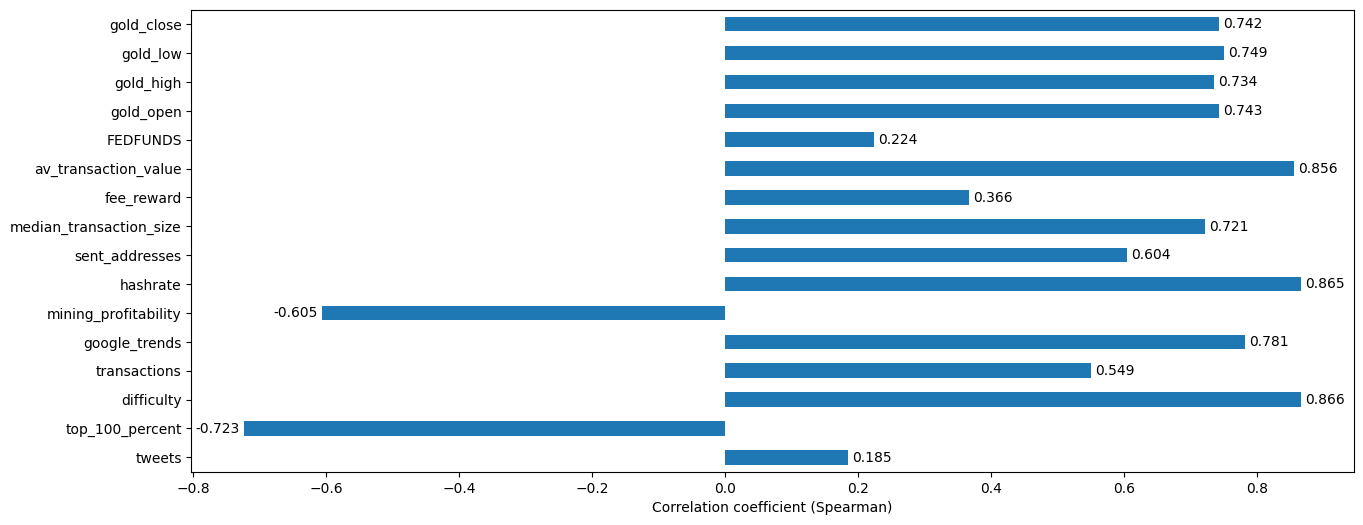

In [43]:
correlations = pd.Series([X[x].corr(Y, method='spearman') for x in X.columns], index=X.columns)
corrplot = correlations.plot(kind="barh", figsize=(15,6))
corrplot.bar_label(corrplot.containers[0], labels=[round(v, 3) for v in correlations], padding=3)
plt.xlabel("Correlation coefficient (Spearman)")
plt.show()